In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [3]:
linearX = pd.read_csv("../data/q1/linearX.csv", header=None).to_numpy()
linearY = pd.read_csv("../data/q1/linearY.csv", header=None).to_numpy()

In [4]:
def normalize(X):
    mean = np.mean(X)
    stdev = np.std(X)
    # X = np.array([(value-mean)/stdev for value in X])
    X = (X-mean)/stdev
    return (X, mean, stdev)

In [5]:
(normX, meanX, stdevX) = normalize(linearX)
(normY, meanY, stdevY) = normalize(linearY)
print(linearX.shape)

(100, 1)


In [5]:
ones_column = np.ones((normX.shape[0], 1))  # Create a column of ones
X = np.hstack((np.ones((normX.shape[0], 1)), normX.reshape(-1, 1)))  # Stack columns horizontally
Y = normY

In [6]:
def compute_error(X, Y, theta):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += (Y[i] - np.dot(theta, X[i]))**2
    cost = cost/(2*m)
    return cost

In [7]:
def compute_gradient(X, Y, theta):
    m = X.shape[0]
    dj_dtheta = np.zeros(2)
    for i in range(m):
        dj_dtheta += (Y[i] - np.dot(theta, X[i]))*X[i]
    return dj_dtheta/m

In [8]:
m = X.shape
theta = np.zeros(2)
compute_error(X, Y, theta)

array([0.5])

In [45]:
def gradient_descent(X, Y, theta, max_iterations, learn_prm):
    theta_hist = []
    prev_error = compute_error(X, Y, theta)
    for i in range(max_iterations):
        grad = np.array(compute_gradient(X, Y, theta))
        theta_hist.append([theta[0], theta[1]])
        theta = theta + learn_prm*grad
        new_error = compute_error(X, Y, theta)
        print(f"Iteration {i} | Difference Error {abs(prev_error-new_error)} | Theta: {theta}")
        if abs(prev_error - new_error) < 1e-11:
            break
        prev_error = new_error
    return (theta_hist, theta)

In [46]:
m = X.shape
theta = np.zeros(2)
compute_error(X, Y, theta)
max_iterations = 10000
learn_prm = 0.025
(theta_hist, theta_new) = gradient_descent(X, Y, theta, max_iterations, learn_prm)

Iteration 0 | Difference Error [0.01059364] | Theta: [-1.49219699e-15  1.63766107e-02]
Iteration 1 | Difference Error [0.01007058] | Theta: [-2.94690834e-15  3.23438061e-02]
Iteration 2 | Difference Error [0.00957334] | Theta: [-4.36566755e-15  4.79118216e-02]
Iteration 3 | Difference Error [0.00910066] | Theta: [-5.74893258e-15  6.30906367e-02]
Iteration 4 | Difference Error [0.00865131] | Theta: [-7.09814499e-15  7.78899814e-02]
Iteration 5 | Difference Error [0.00822416] | Theta: [-8.41399520e-15  9.23193425e-02]
Iteration 6 | Difference Error [0.00781809] | Theta: [-9.69680239e-15  1.06387970e-01]
Iteration 7 | Difference Error [0.00743207] | Theta: [-1.09470176e-14  1.20104881e-01]
Iteration 8 | Difference Error [0.00706511] | Theta: [-1.21662576e-14  1.33478870e-01]
Iteration 9 | Difference Error [0.00671627] | Theta: [-1.33558407e-14  1.46518509e-01]
Iteration 10 | Difference Error [0.00638466] | Theta: [-1.45153022e-14  1.59232157e-01]
Iteration 11 | Difference Error [0.0060694

In [47]:
final_theta = [stdevY*theta_new[0] - theta_new[1]*meanX*stdevY/stdevX + meanY, stdevY*theta_new[1]/stdevX]
final_theta

[0.9903498942072797, 0.0007777481757281448]

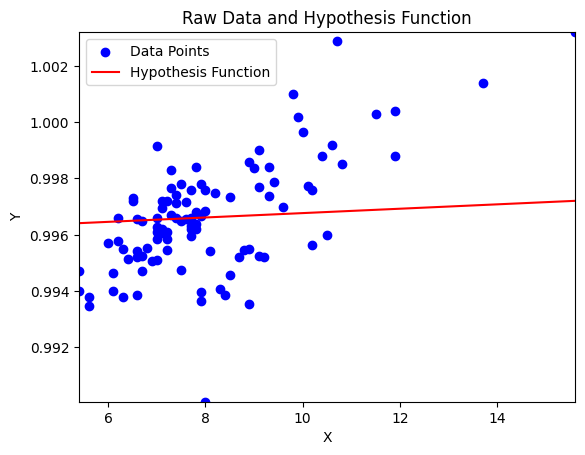

In [12]:
plt.scatter(linearX[:, 0], linearY[:, 0], color='blue', label='Data Points')
x_range = np.linspace(min(linearX[:, 0]), max(linearX[:, 0]), 100)
y_pred = final_theta[0] + final_theta[1]*x_range
plt.plot(x_range, y_pred, color='red', label='Hypothesis Function')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
# Set appropriate axis limits
x_min = min(linearX[:, 0])
x_max = max(linearX[:, 0])
y_min = min(linearY[:, 0])
y_max = max(linearY[:, 0])
y_center = 1  # Center of y-axis values
# Set x-axis and y-axis limits based on data ranges and centering of y-axis
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw Data and Hypothesis Function')
plt.legend()
plt.show()

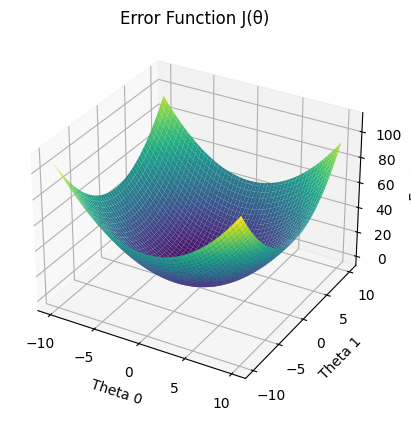

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have implemented gradient descent and have arrays for parameter history and error history
# parameter_history is a list of tuples where each tuple contains (theta_0, theta_1) for an iteration
# error_history is a list of error values corresponding to each iteration

# Create a mesh grid for the parameter space
theta0_vals = np.linspace(-10, 10, 100)  # Adjust the range as needed
theta1_vals = np.linspace(-10, 10, 100)  # Adjust the range as needed
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the error values for each parameter combination
error_vals = np.zeros_like(theta0_vals)
for i in range(len(theta0_vals)):
    for j in range(len(theta0_vals[i])):
        # Calculate error using the current parameters
        current_theta0 = theta0_vals[i, j]
        current_theta1 = theta1_vals[i, j]
        error_vals[i, j] = compute_error(X, Y, [current_theta0, current_theta1])  # Replace with your error calculation

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh
ax.plot_surface(theta0_vals, theta1_vals, error_vals, cmap='viridis')

ax.scatter(theta_new[0], theta_new[1], compute_error(X, Y, theta_new), color='red', label='Min Error Point')

# Set labels for the axes
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Error')

plt.title('Error Function J(θ)')
plt.show()


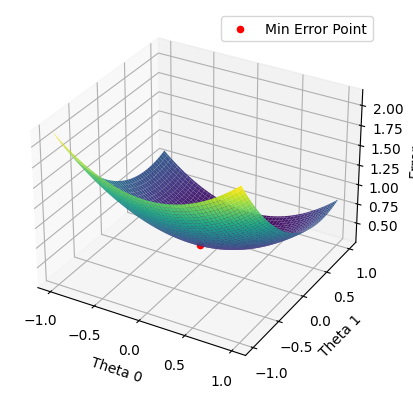

In [14]:
# Assuming you have implemented gradient descent and have arrays for parameter history and error history
# parameter_history is a list of tuples where each tuple contains (theta_0, theta_1) for an iteration
# error_history is a list of error values corresponding to each iteration

# Create a mesh grid for the parameter space
theta0_vals = np.linspace(-1, 1, 100)  # Adjust the range as needed
theta1_vals = np.linspace(-1, 1, 100)  # Adjust the range as needed
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the error values for each parameter combination
error_vals = np.zeros_like(theta0_vals)
for i in range(len(theta0_vals)):
    for j in range(len(theta0_vals[i])):
        # Calculate error using the current parameters
        current_theta0 = theta0_vals[i, j]
        current_theta1 = theta1_vals[i, j]
        error_vals[i, j] = compute_error(X, Y, [current_theta0, current_theta1])  # Replace with your error calculation

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh
ax.plot_surface(theta0_vals, theta1_vals, error_vals, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Error')

# Create an empty scatter plot for the current parameter point
scatter = ax.scatter([], [], [], color='red', label='Min Error Point')

# Initialize the legend
ax.legend()

# Update function for animation
def update(frame):
    theta_new = theta_hist[frame]
    error_new = compute_error(X, Y, theta_new)
    scatter.set_offsets(np.array([[theta_new[0], theta_new[1]]]))
    scatter.set_3d_properties(error_new, 'z')
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(theta_hist), interval=200, blit=True)

# Show the animation
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


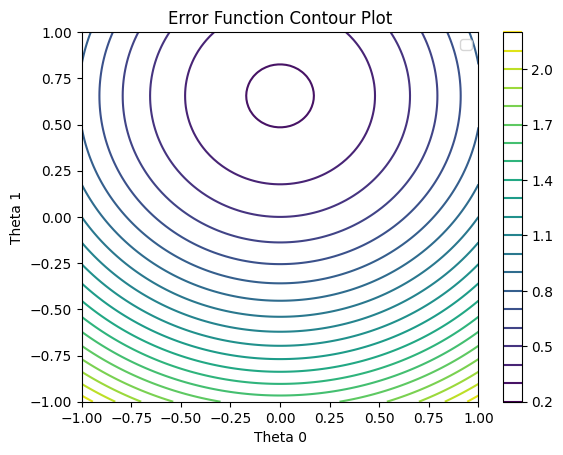

In [15]:
# # Create a mesh grid for the parameter space
theta0_vals = np.linspace(-1, 1, 100)  # Adjust the range as needed for theta0
theta1_vals = np.linspace(-1, 1, 100)  # Adjust the range as needed for theta1
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the error values for each parameter combination
error_vals = np.zeros_like(theta0_vals)
for i in range(len(theta0_vals)):
    for j in range(len(theta0_vals[i])):
        # Calculate error using the current parameters
        current_theta0 = theta0_vals[i, j]
        current_theta1 = theta1_vals[i, j]
        error_vals[i, j] = compute_error(X, Y, [current_theta0, current_theta1])  # Replace with your error calculation

# Create a contour plot of the error function
plt.contour(theta0_vals, theta1_vals, error_vals, levels=20, cmap='viridis')

def update(frame):
    thetanew = theta_hist[frame]
    scatter.set_offsets(np.array([[thetanew[0], thetanew[1]]]))
    return scatter,

# Create the animation
ani = FuncAnimation(plt.gcf(), update, frames=len(theta_hist), interval=200, blit=True)

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Error Function Contour Plot')
plt.colorbar()  # Add a colorbar to the plot
plt.legend()
plt.show()